In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

from sklearn.model_selection import train_test_split
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Custom loss function

In [15]:
# mask for empty value
mask_value = -1
def masked_loss_function(y_true, y_pred):
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    return K.binary_crossentropy(y_true * mask, y_pred * mask)

# This is the same as 'binary_crossentropy' for comparing 
def another_loss_function(y_true, y_pred):
    return K.binary_crossentropy(y_true, y_pred)

## Generate toy data

In [3]:
N =100000
X = np.random.rand(N,2)
# place holder for Y
Y = np.ones((N,3))

Y[:,0] = X[:, 1] <= 0.5
Y[:,1] = X[:, 0] >= 0.5

# s1 = X[:, 0] < 0.25
# s2 = np.logical_and(X[:, 0] > 0.5, X[:, 0] < 0.75)
# Y[:,2] = np.logical_or(s1, s2)

Y[:,2] = X[:, 0] + X[:, 1] > 1

## Mark some empty values

In [4]:
Y[: int(N*0.020), 0] = mask_value
Y[int(N*0.018): int(N*0.0025), 1] = mask_value
Y[int(N*0.024): int(N*0.0035), 2] = mask_value

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
# Compile model
# masked_loss_function
model.compile(loss=masked_loss_function, optimizer='adam', metrics=['accuracy'])

# split into 90% for train and 10% for dev
X_train, X_dev, y_train, y_dev = train_test_split(X[:-3000], Y[:-3000], test_size=0.9, 
                                                  random_state=seed)

history = model.fit(X_train, y_train, validation_data=(X_dev,y_dev), 
                    epochs=2000, batch_size=5000)

## Evaluate with reserved data

In [6]:
model.evaluate(X[-3000:],Y[-3000:])

3000/3000 [==============================] - 0s 56us/step


[0.005318966815364547, 0.8900000001589458]

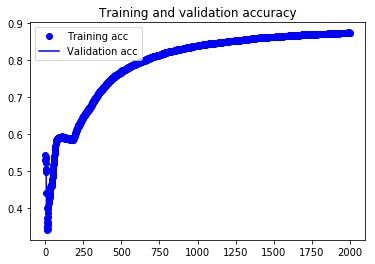

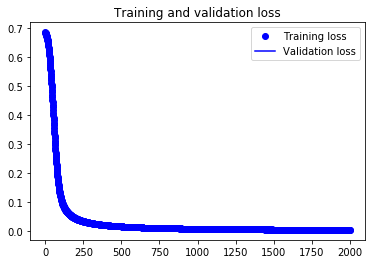

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [8]:
Xp = model.predict(X[-20:])
(Xp > 0.5).astype(int) == Y[-20:]

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [9]:
X[-20:]

array([[0.61840834, 0.86341407],
       [0.15494294, 0.1841383 ],
       [0.20182673, 0.50630397],
       [0.07213736, 0.50305125],
       [0.91383753, 0.71906417],
       [0.18597285, 0.34451812],
       [0.8291162 , 0.433129  ],
       [0.79522746, 0.45426891],
       [0.80805517, 0.3113715 ],
       [0.03561528, 0.02424354],
       [0.10534969, 0.71992058],
       [0.77305932, 0.94939868],
       [0.29571047, 0.56725521],
       [0.97922777, 0.30127676],
       [0.15388802, 0.38957785],
       [0.17775771, 0.46540355],
       [0.34774891, 0.52433704],
       [0.25630399, 0.02285498],
       [0.61838134, 0.61101353],
       [0.23108386, 0.01126141]])

## Plot Decision Boundary

In [10]:
def plot_decision_boundary(model, label, steps=1000, index=0):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """   
    plt.title(label + " index: "+ str(index))
    axes = plt.gca()
    axes.set_xlim([0, 1])
    axes.set_ylim([0, 1])
    # Define region of interest by data limits
    xmin, xmax = 0, 1
    ymin, ymax = 0, 1
    steps = 200
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])[:,index]

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    plt.contourf(xx, yy, z, cmap=plt.cm.Spectral)    
    plt.ylabel('x1')
    plt.xlabel('x0')
    plt.show()

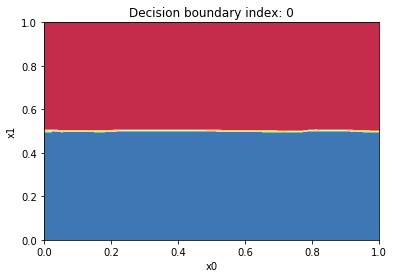

In [11]:
plot_decision_boundary(model, label="Decision boundary", index = 0)

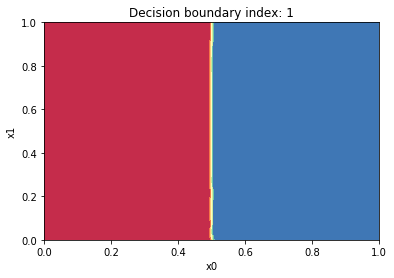

In [12]:
plot_decision_boundary(model, label="Decision boundary", index = 1)

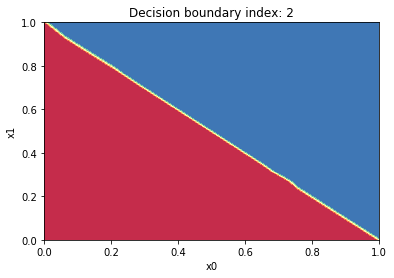

In [13]:
plot_decision_boundary(model, label="Decision boundary", index = 2)

In [14]:
x = np.array([[0.19, 1]])
model.predict(x) > 0.5

array([[False, False,  True]])

# Compare with model without loss function mask

In [16]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
# Compile model
# another_loss_function
model.compile(loss=another_loss_function, optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_dev,y_dev), 
                    epochs=2000, batch_size=5000)
model.evaluate(X[-3000:],Y[-3000:])

Train on 9700 samples, validate on 87300 samples
Epoch 1/2000
9700/9700 [==============================] - 0s 36us/step - loss: 0.7022 - acc: 0.5190 - val_loss: 0.7007 - val_acc: 0.3897
Epoch 2/2000
9700/9700 [==============================] - 0s 8us/step - loss: 0.7004 - acc: 0.3891 - val_loss: 0.6987 - val_acc: 0.3816
Epoch 3/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.6983 - acc: 0.3881 - val_loss: 0.6966 - val_acc: 0.5852
Epoch 4/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.6962 - acc: 0.5986 - val_loss: 0.6945 - val_acc: 0.6542
Epoch 5/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.6942 - acc: 0.6639 - val_loss: 0.6926 - val_acc: 0.6814
Epoch 6/2000
9700/9700 [==============================] - 0s 5us/step - loss: 0.6923 - acc: 0.6804 - val_loss: 0.6908 - val_acc: 0.6842
Epoch 7/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.6905 - acc: 0.6866 - val_loss: 0.6891 - val_acc: 0.684

9700/9700 [==============================] - 0s 7us/step - loss: 0.5387 - acc: 0.5607 - val_loss: 0.5369 - val_acc: 0.5613
Epoch 61/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.5348 - acc: 0.5628 - val_loss: 0.5329 - val_acc: 0.5627
Epoch 62/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.5307 - acc: 0.5643 - val_loss: 0.5289 - val_acc: 0.5637
Epoch 63/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.5266 - acc: 0.5651 - val_loss: 0.5248 - val_acc: 0.5647
Epoch 64/2000
9700/9700 [==============================] - 0s 8us/step - loss: 0.5225 - acc: 0.5664 - val_loss: 0.5206 - val_acc: 0.5658
Epoch 65/2000
9700/9700 [==============================] - 0s 8us/step - loss: 0.5183 - acc: 0.5680 - val_loss: 0.5164 - val_acc: 0.5671
Epoch 66/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.5140 - acc: 0.5715 - val_loss: 0.5120 - val_acc: 0.5688
Epoch 67/2000
9700/9700 [==============================

9700/9700 [==============================] - 0s 7us/step - loss: 0.1904 - acc: 0.5745 - val_loss: 0.1897 - val_acc: 0.5695
Epoch 120/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.1866 - acc: 0.5749 - val_loss: 0.1859 - val_acc: 0.5709
Epoch 121/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.1829 - acc: 0.5763 - val_loss: 0.1823 - val_acc: 0.5710
Epoch 122/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.1793 - acc: 0.5761 - val_loss: 0.1788 - val_acc: 0.5697
Epoch 123/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.1759 - acc: 0.5748 - val_loss: 0.1754 - val_acc: 0.5682
Epoch 124/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.1725 - acc: 0.5748 - val_loss: 0.1721 - val_acc: 0.5689
Epoch 125/2000
9700/9700 [==============================] - 0s 5us/step - loss: 0.1693 - acc: 0.5755 - val_loss: 0.1689 - val_acc: 0.5695
Epoch 126/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.0765 - acc: 0.5726 - val_loss: 0.0775 - val_acc: 0.5651
Epoch 179/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0755 - acc: 0.5728 - val_loss: 0.0765 - val_acc: 0.5658
Epoch 180/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.0746 - acc: 0.5724 - val_loss: 0.0756 - val_acc: 0.5636
Epoch 181/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0737 - acc: 0.5705 - val_loss: 0.0747 - val_acc: 0.5619
Epoch 182/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0727 - acc: 0.5692 - val_loss: 0.0737 - val_acc: 0.5613
Epoch 183/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.0719 - acc: 0.5685 - val_loss: 0.0728 - val_acc: 0.5612
Epoch 184/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.0710 - acc: 0.5671 - val_loss: 0.0719 - val_acc: 0.5592
Epoch 185/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 6us/step - loss: 0.0383 - acc: 0.5234 - val_loss: 0.0392 - val_acc: 0.5154
Epoch 238/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0379 - acc: 0.5229 - val_loss: 0.0389 - val_acc: 0.5144
Epoch 239/2000
9700/9700 [==============================] - 0s 5us/step - loss: 0.0374 - acc: 0.5219 - val_loss: 0.0385 - val_acc: 0.5136
Epoch 240/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0370 - acc: 0.5213 - val_loss: 0.0381 - val_acc: 0.5129
Epoch 241/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0366 - acc: 0.5198 - val_loss: 0.0377 - val_acc: 0.5123
Epoch 242/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0362 - acc: 0.5201 - val_loss: 0.0372 - val_acc: 0.5134
Epoch 243/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0358 - acc: 0.5204 - val_loss: 0.0368 - val_acc: 0.5128
Epoch 244/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.0196 - acc: 0.4952 - val_loss: 0.0209 - val_acc: 0.4862
Epoch 297/2000
9700/9700 [==============================] - 0s 8us/step - loss: 0.0193 - acc: 0.4961 - val_loss: 0.0207 - val_acc: 0.4852
Epoch 298/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.0191 - acc: 0.4948 - val_loss: 0.0205 - val_acc: 0.4843
Epoch 299/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.0188 - acc: 0.4943 - val_loss: 0.0202 - val_acc: 0.4860
Epoch 300/2000
9700/9700 [==============================] - 0s 5us/step - loss: 0.0186 - acc: 0.4961 - val_loss: 0.0199 - val_acc: 0.4862
Epoch 301/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.0184 - acc: 0.4949 - val_loss: 0.0199 - val_acc: 0.4851
Epoch 302/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0182 - acc: 0.4949 - val_loss: 0.0195 - val_acc: 0.4870
Epoch 303/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 6us/step - loss: 0.0091 - acc: 0.5393 - val_loss: 0.0107 - val_acc: 0.5345
Epoch 356/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.0090 - acc: 0.5397 - val_loss: 0.0106 - val_acc: 0.5359
Epoch 357/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0089 - acc: 0.5413 - val_loss: 0.0104 - val_acc: 0.5365
Epoch 358/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0088 - acc: 0.5419 - val_loss: 0.0103 - val_acc: 0.5363
Epoch 359/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0086 - acc: 0.5416 - val_loss: 0.0102 - val_acc: 0.5361
Epoch 360/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0085 - acc: 0.5412 - val_loss: 0.0100 - val_acc: 0.5371
Epoch 361/2000
9700/9700 [==============================] - 0s 8us/step - loss: 0.0084 - acc: 0.5432 - val_loss: 0.0099 - val_acc: 0.5385
Epoch 362/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 6us/step - loss: 0.0028 - acc: 0.5663 - val_loss: 0.0047 - val_acc: 0.5598
Epoch 415/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0028 - acc: 0.5663 - val_loss: 0.0045 - val_acc: 0.5607
Epoch 416/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0026 - acc: 0.5670 - val_loss: 0.0044 - val_acc: 0.5618
Epoch 417/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0027 - acc: 0.5686 - val_loss: 0.0043 - val_acc: 0.5625
Epoch 418/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0025 - acc: 0.5688 - val_loss: 0.0044 - val_acc: 0.5614
Epoch 419/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.0024 - acc: 0.5679 - val_loss: 0.0042 - val_acc: 0.5616
Epoch 420/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.0024 - acc: 0.5680 - val_loss: 0.0041 - val_acc: 0.5625
Epoch 421/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: -0.0016 - acc: 0.5807 - val_loss: 2.6797e-04 - val_acc: 0.5739
Epoch 473/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0017 - acc: 0.5802 - val_loss: 2.9670e-04 - val_acc: 0.5736
Epoch 474/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0018 - acc: 0.5799 - val_loss: 1.2786e-04 - val_acc: 0.5743
Epoch 475/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0019 - acc: 0.5800 - val_loss: 9.0055e-05 - val_acc: 0.5743
Epoch 476/2000
9700/9700 [==============================] - 0s 5us/step - loss: -0.0019 - acc: 0.5803 - val_loss: 2.4396e-05 - val_acc: 0.5746
Epoch 477/2000
9700/9700 [==============================] - 0s 8us/step - loss: -0.0020 - acc: 0.5805 - val_loss: -1.8041e-05 - val_acc: 0.5750
Epoch 478/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0020 - acc: 0.5808 - val_loss: -1.3503e-04 - val_acc: 0.5753
Epoch 479/20

9700/9700 [==============================] - 0s 6us/step - loss: -0.0049 - acc: 0.5885 - val_loss: -0.0027 - val_acc: 0.5836
Epoch 531/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0049 - acc: 0.5889 - val_loss: -0.0029 - val_acc: 0.5851
Epoch 532/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0050 - acc: 0.5899 - val_loss: -0.0029 - val_acc: 0.5847
Epoch 533/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0051 - acc: 0.5896 - val_loss: -0.0028 - val_acc: 0.5838
Epoch 534/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0051 - acc: 0.5893 - val_loss: -0.0029 - val_acc: 0.5840
Epoch 535/2000
9700/9700 [==============================] - 0s 5us/step - loss: -0.0051 - acc: 0.5897 - val_loss: -0.0030 - val_acc: 0.5846
Epoch 536/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0052 - acc: 0.5899 - val_loss: -0.0031 - val_acc: 0.5852
Epoch 537/2000
9700/9700 [=========

9700/9700 [==============================] - 0s 6us/step - loss: -0.0074 - acc: 0.5958 - val_loss: -0.0051 - val_acc: 0.5928
Epoch 589/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0075 - acc: 0.5966 - val_loss: -0.0050 - val_acc: 0.5928
Epoch 590/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0076 - acc: 0.5968 - val_loss: -0.0051 - val_acc: 0.5927
Epoch 591/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0076 - acc: 0.5968 - val_loss: -0.0052 - val_acc: 0.5930
Epoch 592/2000
9700/9700 [==============================] - 0s 5us/step - loss: -0.0076 - acc: 0.5966 - val_loss: -0.0051 - val_acc: 0.5925
Epoch 593/2000
9700/9700 [==============================] - 0s 8us/step - loss: -0.0077 - acc: 0.5966 - val_loss: -0.0052 - val_acc: 0.5933
Epoch 594/2000
9700/9700 [==============================] - 0s 5us/step - loss: -0.0077 - acc: 0.5976 - val_loss: -0.0053 - val_acc: 0.5940
Epoch 595/2000
9700/9700 [=========

9700/9700 [==============================] - 0s 7us/step - loss: -0.0096 - acc: 0.6035 - val_loss: -0.0069 - val_acc: 0.5986
Epoch 647/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0095 - acc: 0.6042 - val_loss: -0.0069 - val_acc: 0.5986
Epoch 648/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0096 - acc: 0.6037 - val_loss: -0.0069 - val_acc: 0.5985
Epoch 649/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0097 - acc: 0.6041 - val_loss: -0.0070 - val_acc: 0.5990
Epoch 650/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0095 - acc: 0.6041 - val_loss: -0.0070 - val_acc: 0.5988
Epoch 651/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0096 - acc: 0.6040 - val_loss: -0.0068 - val_acc: 0.5989
Epoch 652/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0097 - acc: 0.6051 - val_loss: -0.0071 - val_acc: 0.5999
Epoch 653/2000
9700/9700 [=========

9700/9700 [==============================] - 0s 6us/step - loss: -0.0110 - acc: 0.6096 - val_loss: -0.0083 - val_acc: 0.6046
Epoch 705/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0110 - acc: 0.6104 - val_loss: -0.0083 - val_acc: 0.6049
Epoch 706/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0111 - acc: 0.6101 - val_loss: -0.0083 - val_acc: 0.6040
Epoch 707/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0111 - acc: 0.6096 - val_loss: -0.0083 - val_acc: 0.6040
Epoch 708/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0111 - acc: 0.6096 - val_loss: -0.0083 - val_acc: 0.6041
Epoch 709/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0112 - acc: 0.6099 - val_loss: -0.0084 - val_acc: 0.6046
Epoch 710/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0111 - acc: 0.6099 - val_loss: -0.0084 - val_acc: 0.6047
Epoch 711/2000
9700/9700 [=========

9700/9700 [==============================] - 0s 6us/step - loss: -0.0123 - acc: 0.6152 - val_loss: -0.0094 - val_acc: 0.6097
Epoch 763/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0123 - acc: 0.6163 - val_loss: -0.0094 - val_acc: 0.6096
Epoch 764/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0123 - acc: 0.6161 - val_loss: -0.0093 - val_acc: 0.6083
Epoch 765/2000
9700/9700 [==============================] - 0s 8us/step - loss: -0.0124 - acc: 0.6153 - val_loss: -0.0094 - val_acc: 0.6091
Epoch 766/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0124 - acc: 0.6159 - val_loss: -0.0095 - val_acc: 0.6097
Epoch 767/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0124 - acc: 0.6163 - val_loss: -0.0094 - val_acc: 0.6096
Epoch 768/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0124 - acc: 0.6165 - val_loss: -0.0095 - val_acc: 0.6091
Epoch 769/2000
9700/9700 [=========

9700/9700 [==============================] - 0s 7us/step - loss: -0.0133 - acc: 0.6201 - val_loss: -0.0103 - val_acc: 0.6137
Epoch 821/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0134 - acc: 0.6192 - val_loss: -0.0102 - val_acc: 0.6139
Epoch 822/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0134 - acc: 0.6194 - val_loss: -0.0103 - val_acc: 0.6143
Epoch 823/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0134 - acc: 0.6202 - val_loss: -0.0104 - val_acc: 0.6141
Epoch 824/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0134 - acc: 0.6194 - val_loss: -0.0103 - val_acc: 0.6137
Epoch 825/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0134 - acc: 0.6192 - val_loss: -0.0104 - val_acc: 0.6151
Epoch 826/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0134 - acc: 0.6206 - val_loss: -0.0104 - val_acc: 0.6144
Epoch 827/2000
9700/9700 [=========

9700/9700 [==============================] - 0s 7us/step - loss: -0.0142 - acc: 0.6235 - val_loss: -0.0110 - val_acc: 0.6173
Epoch 879/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0142 - acc: 0.6231 - val_loss: -0.0111 - val_acc: 0.6179
Epoch 880/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0143 - acc: 0.6236 - val_loss: -0.0111 - val_acc: 0.6180
Epoch 881/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0143 - acc: 0.6237 - val_loss: -0.0111 - val_acc: 0.6179
Epoch 882/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0143 - acc: 0.6237 - val_loss: -0.0111 - val_acc: 0.6178
Epoch 883/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0143 - acc: 0.6234 - val_loss: -0.0111 - val_acc: 0.6181
Epoch 884/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0142 - acc: 0.6238 - val_loss: -0.0112 - val_acc: 0.6183
Epoch 885/2000
9700/9700 [=========

9700/9700 [==============================] - 0s 7us/step - loss: -0.0148 - acc: 0.6253 - val_loss: -0.0117 - val_acc: 0.6206
Epoch 937/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0148 - acc: 0.6256 - val_loss: -0.0117 - val_acc: 0.6209
Epoch 938/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0149 - acc: 0.6255 - val_loss: -0.0115 - val_acc: 0.6211
Epoch 939/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0149 - acc: 0.6262 - val_loss: -0.0118 - val_acc: 0.6215
Epoch 940/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0150 - acc: 0.6262 - val_loss: -0.0118 - val_acc: 0.6210
Epoch 941/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0150 - acc: 0.6257 - val_loss: -0.0117 - val_acc: 0.6204
Epoch 942/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0150 - acc: 0.6253 - val_loss: -0.0118 - val_acc: 0.6211
Epoch 943/2000
9700/9700 [=========

9700/9700 [==============================] - 0s 7us/step - loss: -0.0154 - acc: 0.6293 - val_loss: -0.0123 - val_acc: 0.6230
Epoch 995/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0155 - acc: 0.6292 - val_loss: -0.0122 - val_acc: 0.6235
Epoch 996/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0155 - acc: 0.6298 - val_loss: -0.0122 - val_acc: 0.6236
Epoch 997/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0156 - acc: 0.6300 - val_loss: -0.0123 - val_acc: 0.6233
Epoch 998/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0155 - acc: 0.6296 - val_loss: -0.0123 - val_acc: 0.6232
Epoch 999/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0155 - acc: 0.6298 - val_loss: -0.0122 - val_acc: 0.6232
Epoch 1000/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0155 - acc: 0.6295 - val_loss: -0.0123 - val_acc: 0.6233
Epoch 1001/2000
9700/9700 [=======

Epoch 1052/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0160 - acc: 0.6313 - val_loss: -0.0127 - val_acc: 0.6250
Epoch 1053/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0160 - acc: 0.6319 - val_loss: -0.0127 - val_acc: 0.6257
Epoch 1054/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0161 - acc: 0.6324 - val_loss: -0.0128 - val_acc: 0.6260
Epoch 1055/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0161 - acc: 0.6325 - val_loss: -0.0128 - val_acc: 0.6256
Epoch 1056/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0160 - acc: 0.6321 - val_loss: -0.0127 - val_acc: 0.6251
Epoch 1057/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0161 - acc: 0.6313 - val_loss: -0.0128 - val_acc: 0.6255
Epoch 1058/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0161 - acc: 0.6323 - val_loss: -0.0128 - val_acc: 0.6262
Epoch 1059/20

9700/9700 [==============================] - 0s 6us/step - loss: -0.0166 - acc: 0.6342 - val_loss: -0.0131 - val_acc: 0.6275
Epoch 1111/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0165 - acc: 0.6344 - val_loss: -0.0132 - val_acc: 0.6271
Epoch 1112/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0166 - acc: 0.6339 - val_loss: -0.0132 - val_acc: 0.6268
Epoch 1113/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0165 - acc: 0.6340 - val_loss: -0.0132 - val_acc: 0.6272
Epoch 1114/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0166 - acc: 0.6342 - val_loss: -0.0132 - val_acc: 0.6276
Epoch 1115/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0166 - acc: 0.6345 - val_loss: -0.0132 - val_acc: 0.6278
Epoch 1116/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0166 - acc: 0.6345 - val_loss: -0.0133 - val_acc: 0.6273
Epoch 1117/2000
9700/9700 [==

9700/9700 [==============================] - 0s 6us/step - loss: -0.0170 - acc: 0.6358 - val_loss: -0.0136 - val_acc: 0.6289
Epoch 1169/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0170 - acc: 0.6362 - val_loss: -0.0136 - val_acc: 0.6290
Epoch 1170/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0170 - acc: 0.6361 - val_loss: -0.0136 - val_acc: 0.6291
Epoch 1171/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0170 - acc: 0.6362 - val_loss: -0.0136 - val_acc: 0.6288
Epoch 1172/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0170 - acc: 0.6359 - val_loss: -0.0136 - val_acc: 0.6286
Epoch 1173/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0170 - acc: 0.6359 - val_loss: -0.0136 - val_acc: 0.6293
Epoch 1174/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0169 - acc: 0.6368 - val_loss: -0.0136 - val_acc: 0.6296
Epoch 1175/2000
9700/9700 [==

9700/9700 [==============================] - 0s 6us/step - loss: -0.0174 - acc: 0.6371 - val_loss: -0.0140 - val_acc: 0.6309
Epoch 1227/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0174 - acc: 0.6379 - val_loss: -0.0139 - val_acc: 0.6314
Epoch 1228/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0173 - acc: 0.6386 - val_loss: -0.0140 - val_acc: 0.6312
Epoch 1229/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0174 - acc: 0.6378 - val_loss: -0.0139 - val_acc: 0.6300
Epoch 1230/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0173 - acc: 0.6370 - val_loss: -0.0140 - val_acc: 0.6303
Epoch 1231/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0174 - acc: 0.6377 - val_loss: -0.0139 - val_acc: 0.6315
Epoch 1232/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0174 - acc: 0.6387 - val_loss: -0.0140 - val_acc: 0.6313
Epoch 1233/2000
9700/9700 [==

Epoch 1284/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0177 - acc: 0.6400 - val_loss: -0.0143 - val_acc: 0.6325
Epoch 1285/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0178 - acc: 0.6394 - val_loss: -0.0143 - val_acc: 0.6321
Epoch 1286/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0177 - acc: 0.6387 - val_loss: -0.0143 - val_acc: 0.6324
Epoch 1287/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0178 - acc: 0.6391 - val_loss: -0.0143 - val_acc: 0.6332
Epoch 1288/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0176 - acc: 0.6406 - val_loss: -0.0143 - val_acc: 0.6332
Epoch 1289/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0177 - acc: 0.6399 - val_loss: -0.0143 - val_acc: 0.6322
Epoch 1290/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0177 - acc: 0.6390 - val_loss: -0.0143 - val_acc: 0.6325
Epoch 1291/20

Epoch 1342/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0181 - acc: 0.6412 - val_loss: -0.0146 - val_acc: 0.6345
Epoch 1343/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0181 - acc: 0.6416 - val_loss: -0.0146 - val_acc: 0.6344
Epoch 1344/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0181 - acc: 0.6411 - val_loss: -0.0146 - val_acc: 0.6338
Epoch 1345/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0180 - acc: 0.6410 - val_loss: -0.0146 - val_acc: 0.6341
Epoch 1346/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0180 - acc: 0.6411 - val_loss: -0.0146 - val_acc: 0.6345
Epoch 1347/2000
9700/9700 [==============================] - 0s 8us/step - loss: -0.0181 - acc: 0.6415 - val_loss: -0.0146 - val_acc: 0.6341
Epoch 1348/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0180 - acc: 0.6413 - val_loss: -0.0147 - val_acc: 0.6339
Epoch 1349/20

9700/9700 [==============================] - 0s 7us/step - loss: -0.0183 - acc: 0.6425 - val_loss: -0.0149 - val_acc: 0.6355
Epoch 1401/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0183 - acc: 0.6425 - val_loss: -0.0149 - val_acc: 0.6358
Epoch 1402/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0181 - acc: 0.6431 - val_loss: -0.0149 - val_acc: 0.6359
Epoch 1403/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0183 - acc: 0.6428 - val_loss: -0.0148 - val_acc: 0.6354
Epoch 1404/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0183 - acc: 0.6421 - val_loss: -0.0149 - val_acc: 0.6358
Epoch 1405/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0183 - acc: 0.6432 - val_loss: -0.0149 - val_acc: 0.6365
Epoch 1406/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0183 - acc: 0.6434 - val_loss: -0.0150 - val_acc: 0.6360
Epoch 1407/2000
9700/9700 [==

9700/9700 [==============================] - 0s 7us/step - loss: -0.0186 - acc: 0.6443 - val_loss: -0.0152 - val_acc: 0.6375
Epoch 1459/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0186 - acc: 0.6445 - val_loss: -0.0152 - val_acc: 0.6372
Epoch 1460/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0184 - acc: 0.6439 - val_loss: -0.0152 - val_acc: 0.6370
Epoch 1461/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0185 - acc: 0.6444 - val_loss: -0.0151 - val_acc: 0.6376
Epoch 1462/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0185 - acc: 0.6451 - val_loss: -0.0151 - val_acc: 0.6379
Epoch 1463/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0185 - acc: 0.6444 - val_loss: -0.0151 - val_acc: 0.6370
Epoch 1464/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0186 - acc: 0.6440 - val_loss: -0.0152 - val_acc: 0.6371
Epoch 1465/2000
9700/9700 [==

9700/9700 [==============================] - 0s 7us/step - loss: -0.0189 - acc: 0.6460 - val_loss: -0.0154 - val_acc: 0.6383
Epoch 1517/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0189 - acc: 0.6461 - val_loss: -0.0155 - val_acc: 0.6387
Epoch 1518/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0188 - acc: 0.6462 - val_loss: -0.0155 - val_acc: 0.6385
Epoch 1519/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0189 - acc: 0.6467 - val_loss: -0.0154 - val_acc: 0.6382
Epoch 1520/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0189 - acc: 0.6460 - val_loss: -0.0155 - val_acc: 0.6382
Epoch 1521/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0189 - acc: 0.6455 - val_loss: -0.0155 - val_acc: 0.6383
Epoch 1522/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0189 - acc: 0.6459 - val_loss: -0.0154 - val_acc: 0.6382
Epoch 1523/2000
9700/9700 [==

9700/9700 [==============================] - 0s 6us/step - loss: -0.0191 - acc: 0.6469 - val_loss: -0.0156 - val_acc: 0.6394
Epoch 1575/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0191 - acc: 0.6469 - val_loss: -0.0157 - val_acc: 0.6390
Epoch 1576/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0191 - acc: 0.6465 - val_loss: -0.0157 - val_acc: 0.6392
Epoch 1577/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0192 - acc: 0.6470 - val_loss: -0.0157 - val_acc: 0.6395
Epoch 1578/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0191 - acc: 0.6468 - val_loss: -0.0157 - val_acc: 0.6394
Epoch 1579/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0191 - acc: 0.6471 - val_loss: -0.0157 - val_acc: 0.6394
Epoch 1580/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0192 - acc: 0.6470 - val_loss: -0.0157 - val_acc: 0.6395
Epoch 1581/2000
9700/9700 [==

9700/9700 [==============================] - 0s 6us/step - loss: -0.0193 - acc: 0.6473 - val_loss: -0.0158 - val_acc: 0.6402
Epoch 1633/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0193 - acc: 0.6480 - val_loss: -0.0159 - val_acc: 0.6403
Epoch 1634/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0193 - acc: 0.6479 - val_loss: -0.0159 - val_acc: 0.6394
Epoch 1635/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0193 - acc: 0.6472 - val_loss: -0.0159 - val_acc: 0.6396
Epoch 1636/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0194 - acc: 0.6474 - val_loss: -0.0159 - val_acc: 0.6400
Epoch 1637/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0193 - acc: 0.6478 - val_loss: -0.0159 - val_acc: 0.6402
Epoch 1638/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0194 - acc: 0.6479 - val_loss: -0.0159 - val_acc: 0.6396
Epoch 1639/2000
9700/9700 [==

9700/9700 [==============================] - 0s 7us/step - loss: -0.0196 - acc: 0.6478 - val_loss: -0.0160 - val_acc: 0.6405
Epoch 1690/2000
9700/9700 [==============================] - 0s 8us/step - loss: -0.0195 - acc: 0.6488 - val_loss: -0.0160 - val_acc: 0.6410
Epoch 1691/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0195 - acc: 0.6487 - val_loss: -0.0161 - val_acc: 0.6404
Epoch 1692/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0195 - acc: 0.6477 - val_loss: -0.0160 - val_acc: 0.6396
Epoch 1693/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0195 - acc: 0.6476 - val_loss: -0.0161 - val_acc: 0.6405
Epoch 1694/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0195 - acc: 0.6481 - val_loss: -0.0160 - val_acc: 0.6409
Epoch 1695/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0195 - acc: 0.6486 - val_loss: -0.0161 - val_acc: 0.6402
Epoch 1696/2000
9700/9700 [==

9700/9700 [==============================] - 0s 7us/step - loss: -0.0197 - acc: 0.6489 - val_loss: -0.0162 - val_acc: 0.6412
Epoch 1748/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0197 - acc: 0.6493 - val_loss: -0.0163 - val_acc: 0.6405
Epoch 1749/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0197 - acc: 0.6489 - val_loss: -0.0163 - val_acc: 0.6402
Epoch 1750/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0197 - acc: 0.6490 - val_loss: -0.0163 - val_acc: 0.6410
Epoch 1751/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0198 - acc: 0.6491 - val_loss: -0.0163 - val_acc: 0.6407
Epoch 1752/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0198 - acc: 0.6491 - val_loss: -0.0163 - val_acc: 0.6406
Epoch 1753/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0198 - acc: 0.6487 - val_loss: -0.0163 - val_acc: 0.6404
Epoch 1754/2000
9700/9700 [==

9700/9700 [==============================] - 0s 7us/step - loss: -0.0199 - acc: 0.6492 - val_loss: -0.0164 - val_acc: 0.6408
Epoch 1805/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0198 - acc: 0.6497 - val_loss: -0.0164 - val_acc: 0.6413
Epoch 1806/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0199 - acc: 0.6497 - val_loss: -0.0164 - val_acc: 0.6402
Epoch 1807/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0199 - acc: 0.6492 - val_loss: -0.0164 - val_acc: 0.6408
Epoch 1808/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0199 - acc: 0.6496 - val_loss: -0.0164 - val_acc: 0.6414
Epoch 1809/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0198 - acc: 0.6499 - val_loss: -0.0164 - val_acc: 0.6409
Epoch 1810/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0199 - acc: 0.6498 - val_loss: -0.0164 - val_acc: 0.6408
Epoch 1811/2000
9700/9700 [==

9700/9700 [==============================] - 0s 7us/step - loss: -0.0201 - acc: 0.6498 - val_loss: -0.0165 - val_acc: 0.6410
Epoch 1863/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0200 - acc: 0.6500 - val_loss: -0.0165 - val_acc: 0.6410
Epoch 1864/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0200 - acc: 0.6502 - val_loss: -0.0165 - val_acc: 0.6419
Epoch 1865/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0200 - acc: 0.6506 - val_loss: -0.0166 - val_acc: 0.6413
Epoch 1866/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0201 - acc: 0.6499 - val_loss: -0.0166 - val_acc: 0.6409
Epoch 1867/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0201 - acc: 0.6497 - val_loss: -0.0166 - val_acc: 0.6408
Epoch 1868/2000
9700/9700 [==============================] - ETA: 0s - loss: -0.0083 - acc: 0.64 - 0s 7us/step - loss: -0.0201 - acc: 0.6498 - val_loss: -0.0166 - val_acc

9700/9700 [==============================] - 0s 7us/step - loss: -0.0202 - acc: 0.6501 - val_loss: -0.0168 - val_acc: 0.6413
Epoch 1920/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0203 - acc: 0.6500 - val_loss: -0.0167 - val_acc: 0.6415
Epoch 1921/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0202 - acc: 0.6500 - val_loss: -0.0168 - val_acc: 0.6415
Epoch 1922/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0202 - acc: 0.6499 - val_loss: -0.0167 - val_acc: 0.6410
Epoch 1923/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0203 - acc: 0.6496 - val_loss: -0.0168 - val_acc: 0.6415
Epoch 1924/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0203 - acc: 0.6500 - val_loss: -0.0168 - val_acc: 0.6418
Epoch 1925/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0203 - acc: 0.6500 - val_loss: -0.0168 - val_acc: 0.6413
Epoch 1926/2000
9700/9700 [==

9700/9700 [==============================] - 0s 8us/step - loss: -0.0204 - acc: 0.6505 - val_loss: -0.0170 - val_acc: 0.6416
Epoch 1978/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0204 - acc: 0.6501 - val_loss: -0.0170 - val_acc: 0.6416
Epoch 1979/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0205 - acc: 0.6502 - val_loss: -0.0169 - val_acc: 0.6417
Epoch 1980/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0204 - acc: 0.6502 - val_loss: -0.0170 - val_acc: 0.6418
Epoch 1981/2000
9700/9700 [==============================] - 0s 6us/step - loss: -0.0205 - acc: 0.6500 - val_loss: -0.0169 - val_acc: 0.6419
Epoch 1982/2000
9700/9700 [==============================] - 0s 7us/step - loss: -0.0204 - acc: 0.6503 - val_loss: -0.0169 - val_acc: 0.6421
Epoch 1983/2000
9700/9700 [==============================] - 0s 8us/step - loss: -0.0204 - acc: 0.6504 - val_loss: -0.0170 - val_acc: 0.6418
Epoch 1984/2000
9700/9700 [==

[0.011948973861833414, 0.6580000001589458]

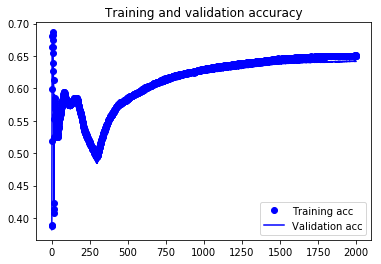

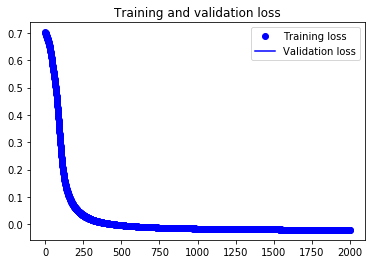

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
